In [1]:
import pandas as pd
from Bio import SeqIO

In [2]:
records = list(SeqIO.parse("uniprot-dihydrofolate+reductase.fasta","fasta"))
records[0]

SeqRecord(seq=Seq('MFLLLNCIVAVSQNMGIGKNGDLPRPPLRNEFRYFQRMTTTSSVEGKQNLVIMG...KDD'), id='sp|Q86XF0|DYR2_HUMAN', name='sp|Q86XF0|DYR2_HUMAN', description='sp|Q86XF0|DYR2_HUMAN Dihydrofolate reductase 2, mitochondrial OS=Homo sapiens OX=9606 GN=DHFR2 PE=1 SV=1', dbxrefs=[])

In [3]:
with open("uniprot-dihydrofolate+reductase.fasta") as fasta_file:
    identifiers = []
    lengths = []
    description = []
    sequences = []
    for seq_record  in SeqIO.parse(fasta_file, "fasta"):
        identifiers.append(str(seq_record.id))
        lengths.append(len(seq_record.seq))
        description.append(str(seq_record.description))
        sequences.append(str(seq_record.seq))
        
    

In [6]:
with open("uniprot-dihydrofolate+reductase.tab") as tab_file:
    data = pd.read_csv(tab_file, sep="\t", header=0, names=["entry",
                                                           "entry_name",
                                                           "status",
                                                           "protein_names",
                                                           "gene_names",
                                                           "organism",
                                                           "length",
                                                           "taxonomic",
                                                           "EC"])
    
data.head()


,entry,entry_name,status,protein_names,gene_names,organism,length,taxonomic,EC
0,Q86XF0,DYR2_HUMAN,reviewed,"Dihydrofolate reductase 2, mitochondrial (Dihy...",DHFR2 DHFRL1 DHFRP4,Homo sapiens (Human),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3
1,Q05762,DRTS1_ARATH,reviewed,Bifunctional dihydrofolate reductase-thymidyla...,THY-1 At2g16370 F16F14.13,Arabidopsis thaliana (Mouse-ear cress),519,"cellular organisms, Eukaryota, Viridiplantae, ...",1.5.1.3; 2.1.1.45
2,P00383,DYR21_ECOLX,reviewed,Dihydrofolate reductase type 2 (EC 1.5.1.3) (D...,NaN,Escherichia coli,78,"cellular organisms, Bacteria, Proteobacteria, ...",1.5.1.3
3,P13922,DRTS_PLAFK,reviewed,Bifunctional dihydrofolate reductase-thymidyla...,NaN,Plasmodium falciparum (isolate K1 / Thailand),608,"cellular organisms, Eukaryota, Sar, Alveolata,...",1.5.1.3; 2.1.1.45
4,P00374,DYR_HUMAN,reviewed,Dihydrofolate reductase (EC 1.5.1.3),DHFR,Homo sapiens (Human),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3


In [9]:
data_n_na = data.dropna( subset=["EC"])

In [10]:
data_n_na.shape

(37469, 9)

In [16]:
idx_ec = data_n_na.protein_names.str.contains("1.5.1.3")

In [17]:
data_ec = data_n_na[idx_ec]

In [20]:
data_ec.length.describe()

count    37114.000000
mean       176.717061
std         59.774806
min         23.000000
25%        161.000000
50%        166.000000
75%        174.000000
max       1534.000000
Name: length, dtype: float64

<AxesSubplot:>

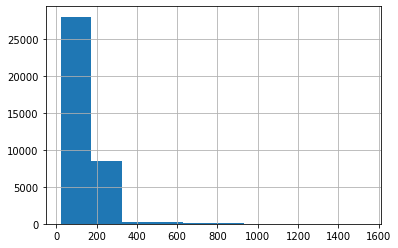

In [21]:
data_ec.length.hist()

In [22]:
data_ec.isna().sum()

entry               0
entry_name          0
status              0
protein_names       0
gene_names       2192
organism            0
length              0
taxonomic           0
EC                  0
dtype: int64

In [32]:
idx = data_ec.EC == "1.5.1.3" 

In [33]:
idx.sum()

36323

In [34]:
data_ec_g = data_ec[idx]

<AxesSubplot:>

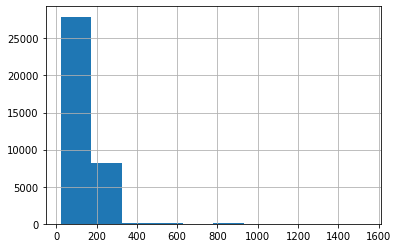

In [36]:
data_ec_g.length.hist()

In [37]:
data_ec_g.describe()

,length
count,36323.000000
mean,172.693775
std,44.991938
min,23.000000
25%,161.000000
50%,166.000000
75%,173.000000
max,1534.000000


In [42]:
data_procesed = data_ec_g[(data_ec_g.length <= 256) & (data_ec_g.length >= 128 )]

In [43]:
data_procesed.length.describe()

count    34637.000000
mean       170.372463
std         16.490519
min        128.000000
25%        161.000000
50%        166.000000
75%        173.000000
max        256.000000
Name: length, dtype: float64

<AxesSubplot:>

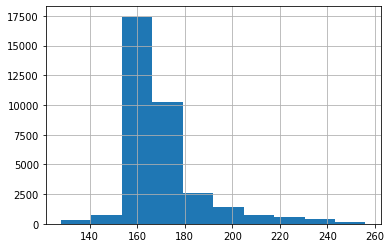

In [44]:
data_procesed.length.hist()

In [45]:
identifiers[0:10]

['sp|Q86XF0|DYR2_HUMAN',
 'sp|Q05762|DRTS1_ARATH',
 'sp|P00383|DYR21_ECOLX',
 'sp|P13922|DRTS_PLAFK',
 'sp|P00374|DYR_HUMAN',
 'sp|P0ABQ4|DYR_ECOLI',
 'sp|P00375|DYR_MOUSE',
 'sp|O02604|DRTS_PLAVI',
 'sp|Q920D2|DYR_RAT',
 'sp|P00381|DYR_LACCA']

In [46]:
identifiers_c = []
for identifier in identifiers:
    identifiers_c.append(identifier.split("|")[1])

In [47]:
identifiers_c[1:10]

['Q05762',
 'P00383',
 'P13922',
 'P00374',
 'P0ABQ4',
 'P00375',
 'O02604',
 'Q920D2',
 'P00381']

In [48]:
identi_seq_dict = {identifiers_c[x]:sequences[x] for x in range(len(identifiers_c))}

In [49]:
data_procesed["sequence"] = data_procesed.entry.apply(lambda row: identi_seq_dict[row])

<ipython-input-49-56c58128cfb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_procesed["sequence"] = data_procesed.entry.apply(lambda row: identi_seq_dict[row])


In [50]:
data_procesed.head()

,entry,entry_name,status,protein_names,gene_names,organism,length,taxonomic,EC,sequence
0,Q86XF0,DYR2_HUMAN,reviewed,"Dihydrofolate reductase 2, mitochondrial (Dihy...",DHFR2 DHFRL1 DHFRP4,Homo sapiens (Human),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MFLLLNCIVAVSQNMGIGKNGDLPRPPLRNEFRYFQRMTTTSSVEG...
4,P00374,DYR_HUMAN,reviewed,Dihydrofolate reductase (EC 1.5.1.3),DHFR,Homo sapiens (Human),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
5,P0ABQ4,DYR_ECOLI,reviewed,Dihydrofolate reductase (EC 1.5.1.3),folA tmrA b0048 JW0047,Escherichia coli (strain K12),159,"cellular organisms, Bacteria, Proteobacteria, ...",1.5.1.3,MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...
6,P00375,DYR_MOUSE,reviewed,Dihydrofolate reductase (EC 1.5.1.3),Dhfr,Mus musculus (Mouse),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MVRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEG...
8,Q920D2,DYR_RAT,reviewed,Dihydrofolate reductase (EC 1.5.1.3),Dhfr,Rattus norvegicus (Rat),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MVRPLNCIVAVSQNMGIGKNGDLPWPLLRNEFKYFQRMTTTSSVEG...


In [51]:
data_procesed

,entry,entry_name,status,protein_names,gene_names,organism,length,taxonomic,EC,sequence
0,Q86XF0,DYR2_HUMAN,reviewed,"Dihydrofolate reductase 2, mitochondrial (Dihy...",DHFR2 DHFRL1 DHFRP4,Homo sapiens (Human),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MFLLLNCIVAVSQNMGIGKNGDLPRPPLRNEFRYFQRMTTTSSVEG...
4,P00374,DYR_HUMAN,reviewed,Dihydrofolate reductase (EC 1.5.1.3),DHFR,Homo sapiens (Human),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEG...
5,P0ABQ4,DYR_ECOLI,reviewed,Dihydrofolate reductase (EC 1.5.1.3),folA tmrA b0048 JW0047,Escherichia coli (strain K12),159,"cellular organisms, Bacteria, Proteobacteria, ...",1.5.1.3,MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...
6,P00375,DYR_MOUSE,reviewed,Dihydrofolate reductase (EC 1.5.1.3),Dhfr,Mus musculus (Mouse),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MVRPLNCIVAVSQNMGIGKNGDLPWPPLRNEFKYFQRMTTTSSVEG...
8,Q920D2,DYR_RAT,reviewed,Dihydrofolate reductase (EC 1.5.1.3),Dhfr,Rattus norvegicus (Rat),187,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MVRPLNCIVAVSQNMGIGKNGDLPWPLLRNEFKYFQRMTTTSSVEG...
...,...,...,...,...,...,...,...,...,...,...
74197,F7CRR0,F7CRR0_XENTR,unreviewed,Dihydrofolate reductase (EC 1.5.1.3),dhfr,Xenopus tropicalis (Western clawed frog) (Silu...,189,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MRNPFLHAVVAVCPPNQGIGKEGSLPWPLLRNEFKHFQRLTMTPTV...
74198,A0A6P7Z1V6,A0A6P7Z1V6_9AMPH,unreviewed,Dihydrofolate reductase (EC 1.5.1.3),LOC115477775,Microcaecilia unicolor,197,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MCDAEGRVDPKPIRLVAAVSRNMGIGQKGDLPWNLPNEFKYFIEKI...
74199,B5X910,B5X910_SALSA,unreviewed,Dihydrofolate reductase (EC 1.5.1.3),DYR,Salmo salar (Atlantic salmon),190,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,MSRVPNCIVAVCPDVGIGNNGNLPWHPKRLNNEFKYFQKMTMTSSV...
74200,A0A7K7WJA0,A0A7K7WJA0_9AVES,unreviewed,Dihydrofolate reductase (EC 1.5.1.3) (Fragment),Dhfr NOTJUL_R13906,Nothocercus julius,145,"cellular organisms, Eukaryota, Opisthokonta, M...",1.5.1.3,GKQNAVIMGKKTWFSIPEKNRPLKDRINIVLSRELKELPRGAHYLS...


In [52]:
### Filter non canonical aa
data_procesed.to_csv("dihydrofolato.csv")